In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import nibabel as nib
from time import time
from xml.etree import ElementTree as ET
import os
import pandas as pd
import sys
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter
from scipy import signal
from scipy.ndimage import zoom
import smtplib
from email.mime.text import MIMEText
import re
import skimage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import scipy
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
import h5py
import numpy_indexed as npi
from sklearn.linear_model import LassoLarsIC
from scipy.linalg import toeplitz


sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants

%matplotlib inline

from BigBadBrain.brain import bleaching_correction, z_score_brain, get_resolution, save_brain, load_numpy_brain, get_dims
from BigBadBrain.fictrac import load_fictrac, interpolate_fictrac
from BigBadBrain.utils import load_timestamps, get_fly_folders, send_email
from BigBadBrain.glm import fit_glm, save_glm_map
from BigBadBrain.motcorr import get_motcorr_brain
from BigBadBrain.visual import load_visual_stimuli_data, load_photodiode, parse_stim_starts_photodiode

In [ ]:
#fly 30 optic is bad
#fly 30 central is good

#fly 29 central is good
#fly 29 optic is bad

In [64]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_30/central'

In [65]:
fictrac = load_fictrac(file)


~~ load_fictrac ~~
Done. Duration: 3.49 sec


(array([8.2868e+04, 6.3860e+03, 5.2800e+02, 1.2900e+02, 5.1000e+01,
        1.5000e+01, 1.5000e+01, 4.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([0.        , 0.0226559 , 0.04531181, 0.06796771, 0.09062361,
        0.11327952, 0.13593542, 0.15859132, 0.18124722, 0.20390313,
        0.22655903]),
 <a list of 10 Patch objects>)

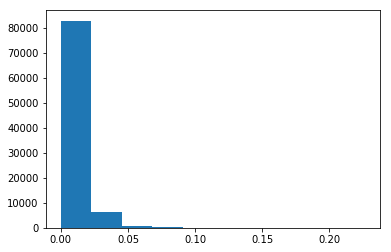

In [66]:
speed = np.asarray(fictrac['speed'])
plt.hist(speed)

Text(0.5, 1.0, 'correct example of speed')

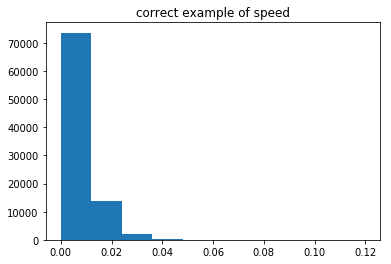

In [39]:
plt.hist(speed)

In [37]:
np.max(speed)

0.11990892123789

In [60]:
4*60+23

263

In [62]:
13000*(1/50)

260.0

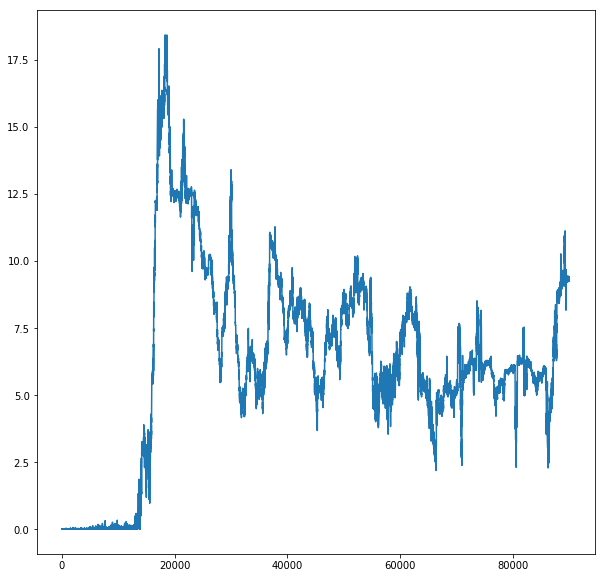

In [63]:
plt.figure(figsize=(10,10))
plt.plot(speed)
#plt.xlim(10000,20000)

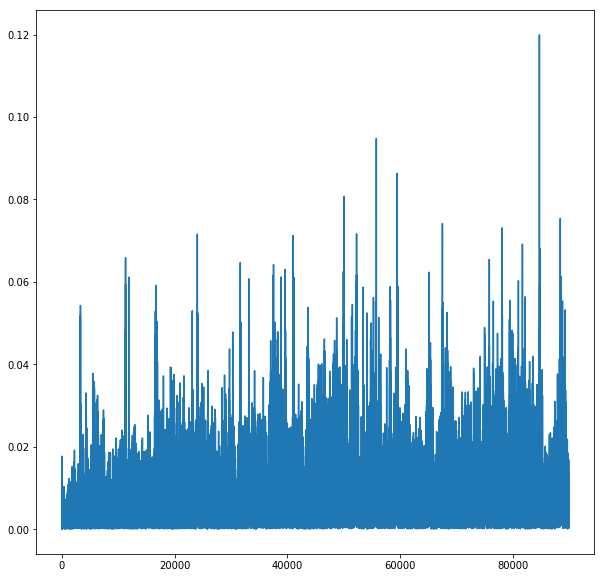

In [38]:
plt.figure(figsize=(10,10))
plt.plot(speed)

In [8]:
img = nib.load(file)

ImageFileError: Cannot work out file type of "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_30/optic/functional.nii"

In [10]:
out = nib.Nifti1Image.from_filename(file)

sizeof_hdr should be 348; set sizeof_hdr to 348
data code 0 not supported; not attempting fix


HeaderDataError: data code 0 not supported

In [ ]:
img = ants.image_read(file)

In [13]:
file

'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_30/optic/functional.nii'

In [26]:
fictrac

,frameCounter,dRotCamX,dRotCamY,dRotCamZ,dRotScore,dRotLabX,dRotLabY,dRotLabZ,AbsRotCamX,AbsRotCamY,...,AbsRotLabZ,positionX,positionY,heading,runningDir,speed,integratedX,integratedY,timeStamp,sequence
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008050,-0.001389,...,1.990364,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,1.554772e+12,0
1,1.0,-0.003100,-0.001537,-0.007105,4432.624044,0.003349,-0.007155,-0.000217,0.004946,-0.002955,...,1.989286,-0.007154,-0.003350,0.000217,3.579381,0.007900,-0.007155,-0.003349,1.554772e+12,1
2,2.0,-0.002407,-0.001347,-0.001039,4803.241093,0.002715,-0.001082,-0.000380,0.002542,-0.004313,...,1.991006,-0.008235,-0.006065,0.000597,4.333189,0.002923,-0.008237,-0.006064,1.554772e+12,2
3,3.0,-0.001876,-0.000422,-0.004149,5121.246181,0.001847,-0.004170,0.000341,0.000659,-0.004748,...,1.990539,-0.012404,-0.007914,0.000256,3.558649,0.004561,-0.012406,-0.007911,1.554772e+12,3
4,4.0,-0.003354,0.004345,0.004970,5720.155215,0.001644,0.005029,0.005180,-0.002710,-0.000422,...,1.998034,-0.007379,-0.009570,6.278261,5.967259,0.005291,-0.007377,-0.009555,1.554772e+12,4
5,5.0,0.000061,0.003358,0.004478,5347.356643,-0.001199,0.004541,0.003045,-0.002660,0.002930,...,2.001321,-0.002830,-0.008401,6.275216,0.258044,0.004697,-0.002836,-0.008357,1.554772e+12,5
6,6.0,0.002880,-0.006901,-0.007115,5006.046841,-0.000316,-0.007225,-0.007364,0.000241,-0.003957,...,1.992529,-0.010054,-0.008054,6.282581,3.097880,0.007232,-0.010061,-0.008041,1.554772e+12,6
7,7.0,0.002537,0.002141,0.002827,4624.987473,-0.003097,0.002885,0.001048,0.002773,-0.001803,...,1.991887,-0.007165,-0.004960,6.281533,0.820852,0.004233,-0.007176,-0.004943,1.554772e+12,7
8,8.0,0.001748,0.000500,0.002513,4173.951551,-0.001777,0.002534,-0.000198,0.004521,-0.001294,...,1.991556,-0.004628,-0.003186,6.281731,0.611634,0.003095,-0.004642,-0.003166,1.554772e+12,8
9,9.0,0.000826,0.000430,0.000819,4252.966249,-0.000914,0.000833,0.000094,0.005347,-0.000860,...,1.991226,-0.003794,-0.002273,6.281637,0.832125,0.001237,-0.003809,-0.002252,1.554772e+12,9
